In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from fbprophet import Prophet

In [0]:
data = pd.read_csv('Train.csv')

In [4]:
data.head()

,timestamp,Soil humidity 1,Irrigation field 1,Soil humidity 2,Irrigation field 2,Soil humidity 3,Irrigation field 3,Soil humidity 4,Irrigation field 4,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg)
0,2019-02-23 00:00:00,67.92,0.0,55.72,0.0,-1.56,1.0,26.57,1.0,19.52,55.04,101.50,2.13,6.30,225.00
1,2019-02-23 00:05:00,67.89,0.0,55.74,0.0,-1.51,1.0,26.58,1.0,19.49,55.17,101.50,2.01,10.46,123.75
2,2019-02-23 00:10:00,67.86,0.0,55.77,0.0,-1.47,1.0,26.59,1.0,19.47,55.30,101.51,1.90,14.63,22.50
3,2019-02-23 00:15:00,67.84,0.0,55.79,0.0,-1.42,1.0,26.61,1.0,19.54,54.20,101.51,2.28,16.08,123.75
4,2019-02-23 00:20:00,67.81,0.0,55.82,0.0,-1.38,1.0,26.62,1.0,19.61,53.09,101.51,2.66,17.52,225.00


In [0]:
data = data.drop([ 'Air temperature (C)','Irrigation field 2', 'Irrigation field 3', 'Irrigation field 1', 'Irrigation field 4'
       ,'Air humidity (%)', 'Pressure (KPa)', 'Wind speed (Km/h)',
       'Wind gust (Km/h)', 'Wind direction (Deg)'], axis = 1)

In [0]:
solid1 = data.drop(['Soil humidity 2', 'Soil humidity 3', 'Soil humidity 4'], axis = 1)
solid2 = data.drop([ 'Soil humidity 1', 'Soil humidity 3', 'Soil humidity 4'], axis = 1)
solid3 = data.drop(['Soil humidity 2', 'Soil humidity 1', 'Soil humidity 4'], axis = 1)
solid4 = data.drop(['Soil humidity 2', 'Soil humidity 3', 'Soil humidity 1'], axis = 1)

In [0]:
solid1.dropna(inplace = True)
solid2.dropna(inplace = True)
solid3.dropna(inplace = True)
solid4.dropna(inplace = True)

In [0]:
train_1 = solid1.copy()
train_2 = solid2.copy()
train_3 = solid3.copy()
train_4 = solid4.copy()

train_1.columns = ['ds', 'y']
train_2.columns = ['ds', 'y']
train_3.columns = ['ds', 'y']
train_4.columns = ['ds', 'y']

In [0]:
all_d = pd.concat([train_1, train_2, train_3, train_4])

In [0]:
values = all_d['y'].values

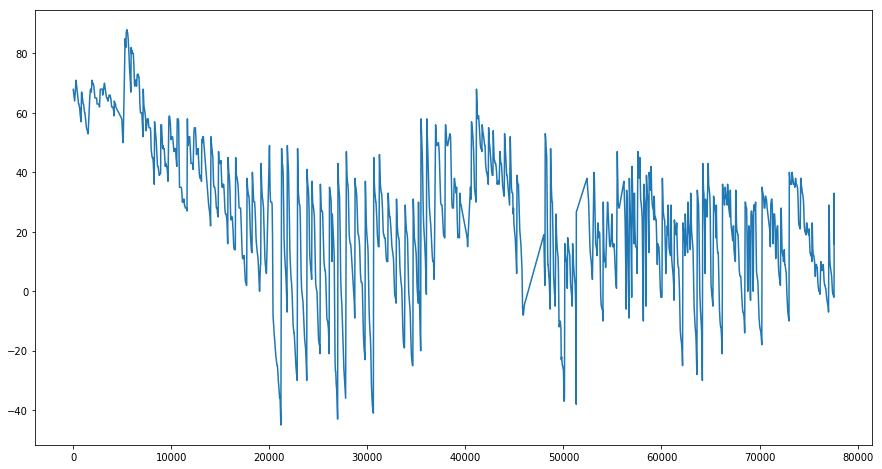

In [120]:
plt.figure(figsize=(15,8))
plt.plot(values)

In [0]:
train = solid4.copy()
train.columns = ['ds', 'y']

In [0]:
model = Prophet()

In [123]:
model.fit(all_d)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [0]:
test = solid2.copy()
test.columns = ['ds', 'y']

In [0]:
forcast = model.predict(test)

In [90]:
forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-02-23 00:00:00,68.542321,63.742690,70.207584,68.542321,68.542321,-1.545894,-1.545894,-1.545894,0.601639,0.601639,0.601639,-2.147533,-2.147533,-2.147533,0.0,0.0,0.0,66.996427
1,2019-02-23 00:05:00,68.541425,63.925928,70.170917,68.541425,68.541425,-1.543759,-1.543759,-1.543759,0.609863,0.609863,0.609863,-2.153622,-2.153622,-2.153622,0.0,0.0,0.0,66.997665
2,2019-02-23 00:10:00,68.540529,63.613525,70.356859,68.540529,68.540529,-1.541801,-1.541801,-1.541801,0.617812,0.617812,0.617812,-2.159613,-2.159613,-2.159613,0.0,0.0,0.0,66.998728
3,2019-02-23 00:15:00,68.539633,63.956995,70.292415,68.539633,68.539633,-1.540064,-1.540064,-1.540064,0.625441,0.625441,0.625441,-2.165505,-2.165505,-2.165505,0.0,0.0,0.0,66.999568
4,2019-02-23 00:20:00,68.538737,63.762575,70.443089,68.538737,68.538737,-1.538595,-1.538595,-1.538595,0.632702,0.632702,0.632702,-2.171298,-2.171298,-2.171298,0.0,0.0,0.0,67.000141


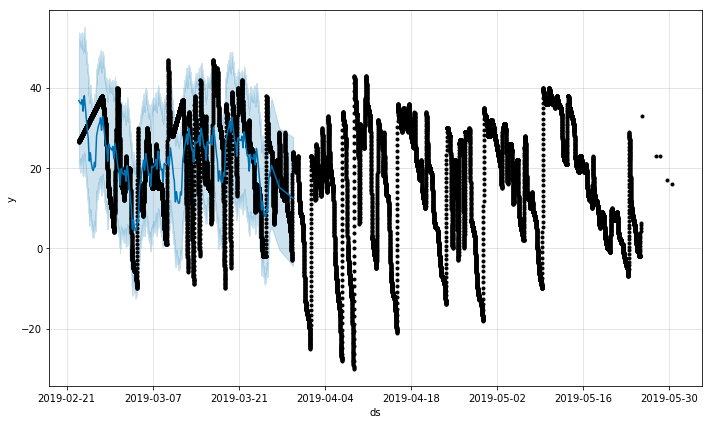

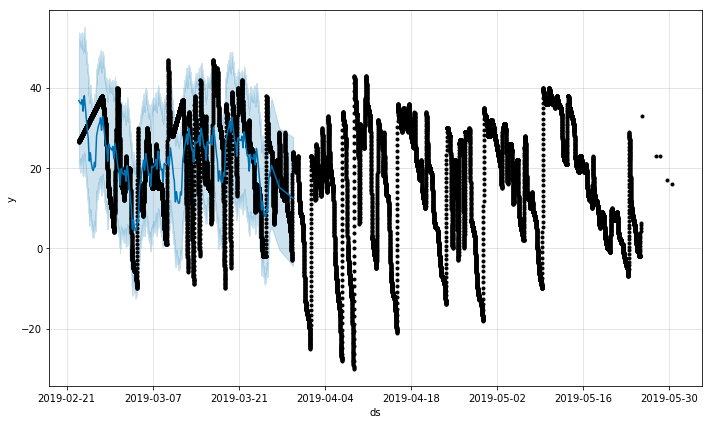

In [109]:
model.plot(forcast)

In [0]:
yhat = forcast['yhat'].values
y_test = test['y'].values

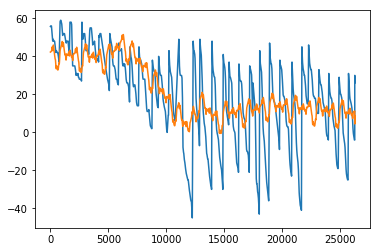

In [132]:
plt.plot(y_test)
plt.plot(yhat)
plt.show()

In [133]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(yhat, y_test)
print(np.sqrt(mse))

17.27157530715407
